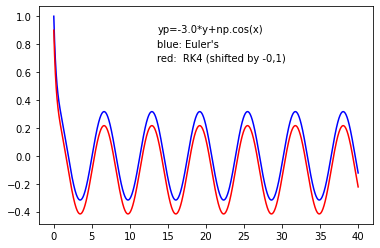

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

def yprime(y,t):
   yp=-3.0*y+np.cos(t)
   return yp

def Euler(y0,t):
   n=len(t)
   yval=np.zeros(n)
   yval[0]=y0

   i=0 
   while i<(n-1):
      tx=t[i]
      dt=t[i+1]-t[i]
      yval[i+1]=yval[i]+yprime(yval[i],tx)*dt
      i=i+1
   return yval

def RK4(y0,t):
   n=len(t)
   yval=np.zeros(n)
   yval[0]=y0
   y=y0

   i=0 
   while i<(n-1):
      tx=t[i]
      dt=t[i+1]-t[i]
      k1=dt*yprime(y,tx)
      k2=dt*yprime(y+k1/2.0,tx+dt/2.0)
      k3=dt*yprime(y+k2/2.0,tx+dt/2.0)
      k4=dt*yprime(y+k3,tx+dt)
      ynext=y+(k1/6.0+k2/3.0+k3/3.0+k4/6.0)
      yval[i+1]=ynext
      y=ynext
      i=i+1

   return yval

# ------------------------
# my program starts here
# ------------------------

y0=1.0
dt = 0.01
t = np.arange(0.0, 40.0, dt) 

outEuler = Euler(y0,t)
outRK4   = RK4(y0,t)

fig=plt.figure(1)
plt.plot(t,outEuler,'b')
plt.plot(t,outRK4-0.1  ,'r')
fig.text(0.4,0.80,"yp=-3.0*y+np.cos(x)",ha='left',va='center')
fig.text(0.4,0.75,"blue: Euler's",ha='left',va='center')
fig.text(0.4,0.70,"red:  RK4 (shifted by -0,1)",ha='left',va='center')
fig.savefig("odeSimple.png")
plt.show()

